In [ ]:
"""Title:
    Problem Statement:Analyze pest incidence and control measures across crops and states.
    Project ID:CBIT/IT-1/EDAV/2025/CEP-35
    Roll No:160124737005
    Name of the Student:Bodikela Abhignya
    Department of IT
    Chaitanya Bharathi Institute of Technology,Hyderabad

Problem Overview:This assignment focuses on analyzing pest incidence data across crops and states. Tasks include calculating average incidence,
filtering by crop, imputing missing values, grouping by pest type and region, and visualizing trends over years. It emphasizes data cleaning,
aggregation, and exploratory analysis, building practical skills in data handling and interpretation.
    

DataSetLink:
          https://drive.google.com/drive/u/0/folders/1KAlqhbXo7ssDEO3wsJ7oGU03PUTp-RoS

Environment:
            python --version:  Python 3.13.7
            Libraries Used:numpy  pandas"""
                                  

In [4]:
#Loading the data set
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\abhignya\\Downloads\\Pest_Incidence_and_Control_India_500rows.csv")
print(df)

     Record_ID       Crop             State   Region         Pest_Name  \
0            1      Onion             Bihar     East          Whitefly   
1            2      Onion         Jharkhand     East   Tikka Leaf Spot   
2            3  Sugarcane       Maharashtra     West            Aphids   
3            4      Apple  Himachal Pradesh    North            Thrips   
4            5       Rice             Assam     East        Stem Borer   
..         ...        ...               ...      ...               ...   
495        496     Cotton       Uttarakhand    North  Tea Mosquito Bug   
496        497  Sugarcane        Tamil Nadu    South       Fruit Borer   
497        498  Sugarcane      Chhattisgarh  Central       Late Blight   
498        499       Okra    Andhra Pradesh    South        Stem Borer   
499        500    Soybean      Chhattisgarh  Central          Whitefly   

    Pest_Type Month_Reported  Incidence_Percent Incidence_Level  \
0      Insect          March               5

In [5]:

# Question 1: Calculate average pest incidence rate (Bloom's level-3)

# Compute the overall average of the column 'Incidence_Percent_Imputed'
# This column represents the pest incidence percentage 
overall_avg = df["Incidence_Percent_Imputed"].mean()

# Print the calculated average pest incidence rate
print(overall_avg)

48.7712


In [6]:
#Question 2:Filter pest reports by crop type (Bloom's level-3)
# Define the crop of interest
crop = "Rice"

# Filter the DataFrame to include only rows where the 'Crop' column matches the specified crop
filtered_df = df[df["Crop"] == crop]

# Print the filtered DataFrame
# The output will show all the data related to the crop "Rice" only
print(filtered_df)

     Record_ID  Crop           State   Region           Pest_Name Pest_Type  \
4            5  Rice           Assam     East          Stem Borer    Insect   
28          29  Rice       Jharkhand     East    Tea Mosquito Bug    Insect   
63          64  Rice          Punjab    North     Tikka Leaf Spot    Fungal   
73          74  Rice     Maharashtra     West          Stem Borer    Insect   
76          77  Rice   Uttar Pradesh    North               Blast    Fungal   
104        105  Rice          Punjab    North              Aphids    Insect   
106        107  Rice       Telangana    South     Tikka Leaf Spot    Fungal   
117        118  Rice  Madhya Pradesh  Central          Stem Borer    Insect   
120        121  Rice      Tamil Nadu    South            Sigatoka    Fungal   
132        133  Rice     Uttarakhand    North    Tea Mosquito Bug    Insect   
137        138  Rice         Gujarat     West     Tikka Leaf Spot    Fungal   
168        169  Rice       Telangana    South       

In [7]:
# Define the crop of interest
crop = "Potato"

# Filter the DataFrame to include only rows where the 'Crop' column matches the specified crop
filtered_df = df[df["Crop"] == crop]

# Print the filtered DataFrame
# The output will show all the data related to the crop "Potato" only
print(filtered_df)

     Record_ID    Crop             State   Region           Pest_Name  \
9           10  Potato       Uttarakhand    North    Tea Mosquito Bug   
56          57  Potato             Assam     East    Tea Mosquito Bug   
74          75  Potato             Assam     East   Brown Planthopper   
112        113  Potato           Haryana    North  Coffee Berry Borer   
121        122  Potato         Rajasthan     West                Wilt   
128        129  Potato    Andhra Pradesh    South                Wilt   
135        136  Potato        Tamil Nadu    South            Whitefly   
205        206  Potato    Andhra Pradesh    South          Stem Borer   
209        210  Potato       West Bengal     East    Tea Mosquito Bug   
215        216  Potato             Assam     East       Fall Armyworm   
263        264  Potato             Assam     East         Fruit Borer   
294        295  Potato        Tamil Nadu    South            Sigatoka   
316        317  Potato    Madhya Pradesh  Central  

In [8]:

# Question 3: Handling missing values in pest incidence data(Bloom's level-4)

# Step 1: Check and print the number of missing values in the 'Incidence_Percent' column
print("No. of empty pest incidence:")
print(df["Incidence_Percent"].isnull().sum())

# Step 2: Fill the missing values in 'Incidence_Percent' with the mean of the column
# This ensures that the column has no empty values for further analysis
df.fillna({"Incidence_Percent": df["Incidence_Percent"].mean()}, inplace=True)

# Step 3: Print the 'Incidence_Percent' column after filling missing values
print("\nIncidence data:\n", df["Incidence_Percent"])

# Step 4: Verify that there are no more missing values in the column
print("\nNo. of empty incidence after imputing:")
print(df["Incidence_Percent"].isnull().sum())

No. of empty pest incidence:
25

Incidence data:
 0      58.2
1      59.9
2      35.8
3      66.8
4      14.2
       ... 
495    39.6
496    34.3
497    34.4
498    79.6
499    48.0
Name: Incidence_Percent, Length: 500, dtype: float64

No. of empty incidence after imputing:
0


In [9]:

#Question-4 : Group reports by pest type and region (BL-4); Q5: Plot pest incidence trends across years (Blooms level-5)


# This will create groups for each unique combination of pest type and region
grouped_reports = df.groupby(["Pest_Type", "Region"])["Incidence_Percent_Imputed"].mean()

# Calculate the mean of 'Incidence_Percent_Imputed' for each group
# This gives the average pest incidence for each Pest_Type × Region combination

# Print the grouped report

print(grouped_reports)

Pest_Type  Region 
Fungal     Central    54.444444
           East       50.769231
           North      48.290566
           South      55.806557
           West       42.377419
Insect     Central    38.223529
           East       46.472917
           North      49.137879
           South      49.953623
           West       45.297561
Name: Incidence_Percent_Imputed, dtype: float64


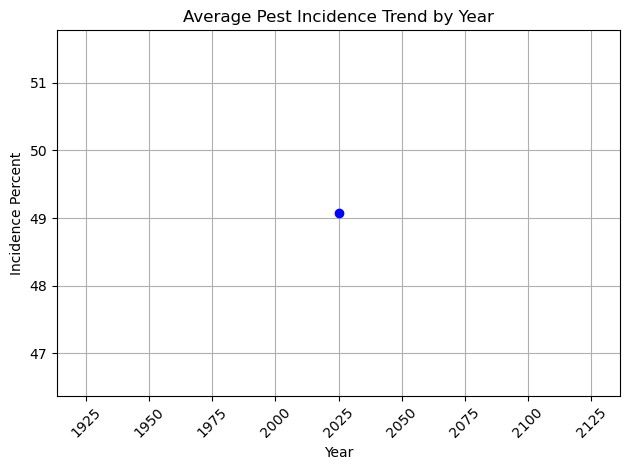

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv(r"C:\\Users\\abhignya\\Downloads\\Pest_Incidence_and_Control_India_500rows.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Group by Year and calculate mean Incidence_Percent
df_grouped = df.groupby("Year")["Incidence_Percent"].mean().reset_index()

# Plot trend
plt.plot(df_grouped["Year"], df_grouped["Incidence_Percent"], marker='o', color='blue')
plt.title("Average Pest Incidence Trend by Year")
plt.xlabel("Year")
plt.ylabel("Incidence Percent")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
